# Frogger, but make it *homework*
## Jack Farmer, 1 Dec 2023

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [31]:
# lilypad count
n = 100

# seed for rng
random.seed(1)

start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value


In [32]:
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)


In [33]:
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between the lilypads behind and the number of lilypads left to jump
            jump = int(random.uniform(-current_paddle,(end-current_paddle+1)))
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.992900
Expectation value for n = 1 is 2.988200
Expectation value for n = 2 is 3.999400
Expectation value for n = 3 is 4.957100
Expectation value for n = 4 is 5.990500
Expectation value for n = 5 is 7.101700
Expectation value for n = 6 is 7.958900
Expectation value for n = 7 is 8.991500
Expectation value for n = 8 is 9.990700
Expectation value for n = 9 is 10.899400
Expectation value for n = 10 is 11.983300
Expectation value for n = 11 is 12.986900
Expectation value for n = 12 is 13.985100
Expectation value for n = 13 is 14.900900
Expectation value for n = 14 is 16.096000
Expectation value for n = 15 is 17.065500
Expectation value for n = 16 is 18.110000
Expectation value for n = 17 is 18.920900
Expectation value for n = 18 is 20.120700
Expectation value for n = 19 is 20.852200
Expectation value for n = 20 is 22.286900
Expectation value for n = 21 is 23.424900
Expectation value for n = 22 is 23.861600
Expectation value for n = 23 is 24.849600
Expectation

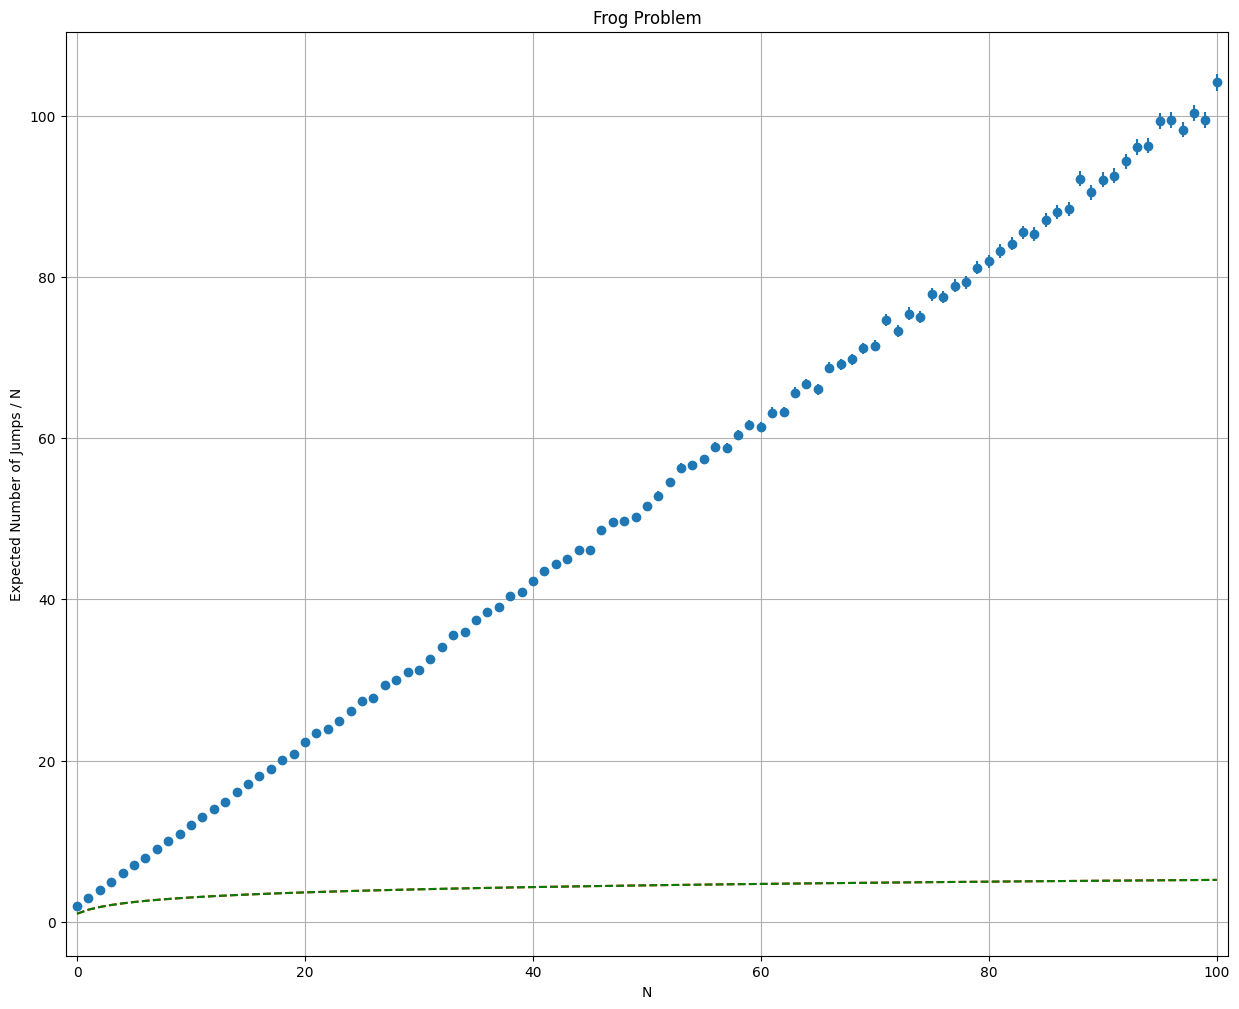

In [34]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')

## Part B

In [35]:
# lilypad count
n = 100

# seed for rng
random.seed(1)

start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x2 = [] # array for the number of lilypads for plotting
y2 = [] # array for the expectation value for plotting
eval2 = [] # array for the analytic solution
eval_harmonic2 = [] # array for the analytic solution
x_harmonic2 = [] # array for the harmonic mean
sigma2 = [] # array for the error on the expectation value

In [36]:
def get_probability(lilypads):
    prob = 0.0
    
    for pad in range(1, lilypads + 2):
        prob += 1.0/pad
    
    return prob

In [37]:
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0, n+1):
    print(npad)
    if (npad == 0):
        eval2.append(1)
    else:
        probability = get_probability(npad) * (npad + 1)
        #print(f"probability: {probability}")
        sum = 1.0 / probability
        #print(f"sum: {sum}")
        
        for i in range(0,npad):
            npads = (eval2[i] + 1) * (npad - i)
            #print(f"npads: {npads}")
            sum = sum + 1.0 / get_probability(npad) * 1.0 / npads
        eval2.append(sum)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [38]:
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic2.append(npad+1)
    x2.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic2.append(sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between the lilypads behind and the number of lilypads left to jump
            jump = int(random.uniform(1,(end-current_paddle+1)))
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y2.append(expectation_value)
    sigma2.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.500900
Expectation value for n = 2 is 1.836400
Expectation value for n = 3 is 2.077400
Expectation value for n = 4 is 2.286100
Expectation value for n = 5 is 2.457800
Expectation value for n = 6 is 2.580900
Expectation value for n = 7 is 2.719300
Expectation value for n = 8 is 2.827100
Expectation value for n = 9 is 2.937900
Expectation value for n = 10 is 3.026300
Expectation value for n = 11 is 3.112800
Expectation value for n = 12 is 3.172100
Expectation value for n = 13 is 3.246400
Expectation value for n = 14 is 3.298400
Expectation value for n = 15 is 3.391100
Expectation value for n = 16 is 3.469200
Expectation value for n = 17 is 3.512800
Expectation value for n = 18 is 3.529600
Expectation value for n = 19 is 3.583100
Expectation value for n = 20 is 3.642400
Expectation value for n = 21 is 3.695700
Expectation value for n = 22 is 3.720600
Expectation value for n = 23 is 3.770700
Expectation value for n = 

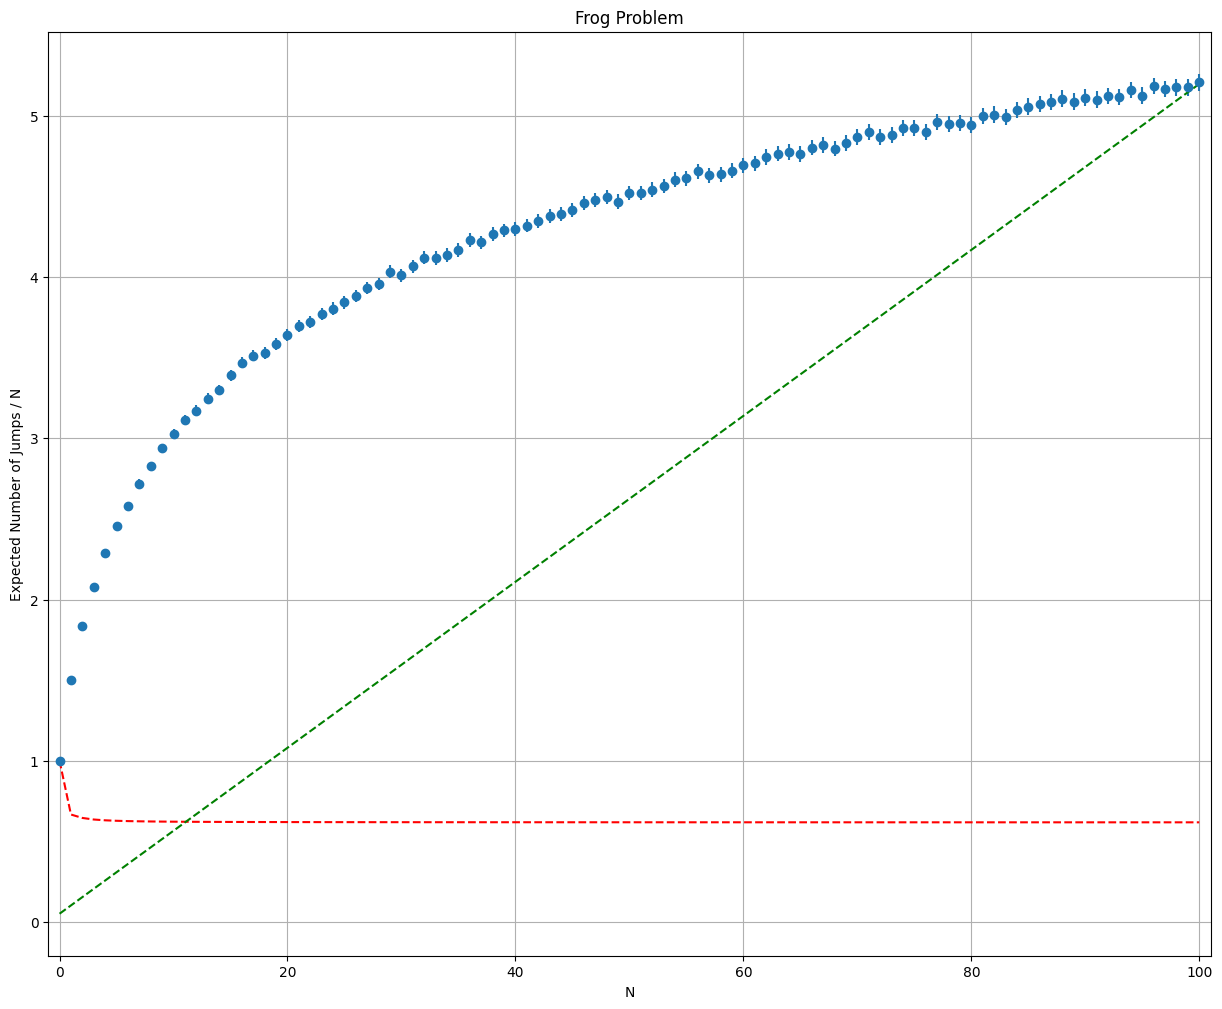

In [39]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x2,y2,yerr=sigma2,fmt='o')
ax1.plot(x2,eval2,'r--')
ax1.plot(x2,eval_harmonic2,'g--')

## Final Comparison

Between the original simulation in class and this one done now, it can be seen that there is a roughly similar number of jumps on average, though it does appear that the final graphs are very very similar to each other in general. Allowing the frog to go in either direction provides a linear growth in jumps compared to the logarithmic growth with just forward jumps.